# NEU 501a Problem Set 2
## Problem 1: Numerical Integration (Optional)
We’re going to start by considering the equation for the voltage of a space-clamped passive membrane:

> $\frac{dV}{dt} = \frac{I - g_L(V-V_L)}{C}$

We’ll simplify things even further and consider the case where $g_L$ = 1, $V_L$ = 0, $C$ = 1, such that the formula above simplifies to:

> $\frac{dV}{dt} = I - V$

### Problem 1a
Find analytical solutions for the voltage as a function of time for the two different starting conditions:
> $V(0)$ = 1, $I$ = 0

> $V(0)$ = 0, $I$ = 1

In both of these cases, $I$ is constant with time. Plot these solutions as a function of time. 

#### Solution 1
With the first set of starting conditions, we begin with:

> $\frac{dV}{dt} = -V$

which can be rewritten as:

> $V^{-1}dv = -1 dt$

Integrating this yields:

> $\int V^{-1}dv = \int-1 dt$

> $ln(V) = -t $

> $ V = e^{-t} $

And it turns out that $V(0)$ = 1:

> $ V = e^0 = 1 $

#### Solution 2
With the first set of starting conditions, we begin with:

> $\frac{dV}{dt} = 1-V$

which can be rewritten as:

> $\frac{dV}{1-V} = dt$

Integrating this yields:

> $\int \frac{dV}{1-V} = \int dt$

> $-ln(1-V) = t $

> $ 1 - V = e^{-t} $

> $ V = 1 - e^{-t} $

And it turns out that $V(0)$ = 0:

> $ V = 1 - e^0 = 1 - 1 = 0 $

We can now plot both solutions.

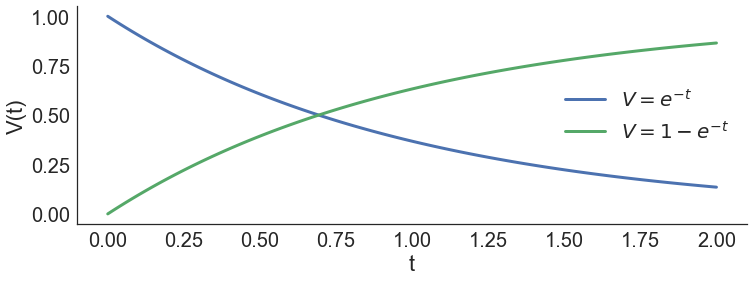

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

## Define functions.
f1 = lambda t: np.exp(-t)
f2 = lambda t: 1 - np.exp(-t)

## Plot.
t = np.linspace(0,2,100)
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(t, f1(t), label=r'$V=e^{-t}$', linewidth=3)
ax.plot(t, f2(t), label=r'$V=1 - e^{-t}$', linewidth=3)
ax.set(xlabel='t', ylabel='V(t)')
ax.legend(loc=7)
sns.despine()

### Problem 1b
Let’s focus for a bit on the case $I$ = 0. Consider the quantity L, which we will define
as $L = \frac{1}{2}V^2$. Show that $\frac{dL}{dt} < 0$. 

#### Solution
When $I$ = 0:

> $L = \frac{1}{2}V^2$

> $L = \frac{1}{2}(e^{-t})^2$

> $L = \frac{1}{2}e^{-2t}$

> $ \frac{dL}{dt} = \frac{1}{2}e^{-2t}dt$

> $ \frac{dL}{dt} = -e^{-2t}$

Because $e^x$ is positive for all real numbers, $-e^x$ must be negative for all real numbers.

### Problem 1c 
Now let’s solve $\frac{dV}{dt} = −V$ numerically. We’ll use simple Euler integration, which uses a first-order approximation to the differential equations. Breaking time into discrete timesteps, and indexing it by timestep:

> $\frac{dV}{dt} \approx \frac{\Delta V}{\Delta t} = \frac{V(t + \Delta t) - V(t)}{\Delta t} \Rightarrow V(t + \Delta t) \approx V(t) + \frac{dV}{dt} \Delta t$

which for our equation $\frac{dV}{dt} = −V$ becomes:

> $ V(t + \Delta t) = V(t)(1 - \Delta t)$

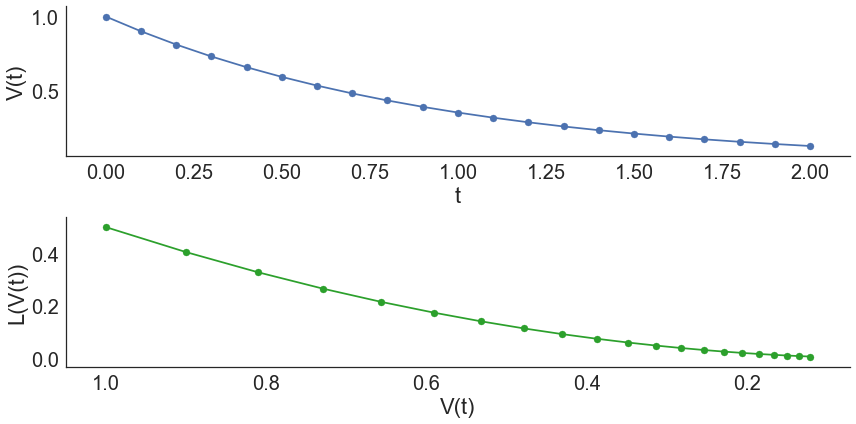

In [2]:
## Define time constant.
dt = 0.1

## Define times.
t = np.arange(0,2+dt,dt)

## Preallocate space for voltage.
V = np.empty_like(t)
V[0] = 1

## Iteratively compute.
for n in np.arange(1,t.size):
    V[n] = V[n-1] * (1 - dt)
    
## Plot.
fig, axes = plt.subplots(2,1,figsize=(12,6))
axes[0].plot(t, V)
axes[0].scatter(t,V)
axes[0].set(xlabel='t', ylabel='V(t)')

axes[1].plot(V, 0.5*V**2, color='#2ca02c')
axes[1].scatter(V, 0.5*V**2, color='#2ca02c')
axes[1].set(xlabel='V(t)', ylabel=r'L(V(t))')
axes[1].invert_xaxis()

sns.despine()
plt.tight_layout()

## Problem 2: The Hodgkin/Huxley Equations
If we now add in the sodium and potassium channels, we get:

> $\frac{dV}{dt} = [I - g_{Na}m^3h(V - V_{Na}) - g_Kn^4(V-V_K)-g_L(V-V_L)]/C $

> $\frac{dn}{dt} = \alpha_n(V)(1-n)-\beta_n(V)(n) $

> $\frac{dm}{dt} = \alpha_m(V)(1-m)-\beta_m(V)(m) $

> $\frac{dh}{dt} = \alpha_h(V)(1-h)-\beta_h(V)(h) $

where

> $ \alpha_n(V) = \frac{0.01(V + 55)}{1 - exp[-(V+55)/10]}, \beta_n(V) = 0.125 e^{\frac{-(V+65)}{80}}$

> $ \alpha_m(V) = \frac{0.1(V + 40)}{1 - exp[-(V+40)/10]}, \beta_m(V) = 4 e^{\frac{-(V+65)}{18}}$

> $ \alpha_h(V) = 0.07e^{\frac{-(V+65)}{20}}, \beta_h(V) = \frac{1}{1 + exp[-(V+35)/10]}  $

In the formulas above, $V$ is the transmembrane potential and $I$ is the current injected into the neuron from a microelectrode. $n$, $m$, and $h$ are dimensionless gating variables. In these equations, *voltage* is measured in mV, *current density* in $\frac{\mu A}{cm^2}$,
*capacitance density* in $\frac{\mu F}{cm^2}$, and *time* in ms. The values of the constants at 6.3 C are:

> $g_{Na}$ = 120, $V_{Na}$ = 50

> $g_K$ = 36, $V_K$ = -77

> $g_L$ = 0.3, $V_L$ = -54.4

> $C$ = 1

### Problem 2a
Write code to numerically integrate the Hodgkin-Huxley equations given above using Euler integration with a time step of 0.01 ms for $I$ = 20 $\frac{\mu A}{cm^2}$. Perform the integration over a time interval of at least 200 ms so that multiple action potentials can be observed.

#### Define Functions for Hodgkin-Huxley Neuron Simulations

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## Here we define all of the functions necessary
## for simulating the Hodgkin-Huxley (HH) neuron. 
## Below we run simulations for the HH neuron under 
## different conditions.

def alpha_n(V):
    return (0.01 * (V + 55)) / (1 - np.exp(-(V+55)/10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65)/80)

def alpha_m(V):
    return (0.1 * (V + 40)) / (1 - np.exp(-(V + 40)/10))

def beta_m(V):
    return 4 * np.exp(-(V+65)/18)

def alpha_h(V):
    return 0.07 * np.exp(-(V+65)/20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V+35)/10))

def I_Na(V, m, h, g_Na=120, V_Na=50):
    return g_Na * m**3 * h * (V - V_Na)

def I_K(V, n, g_K=36, V_K=-77):
    return g_K * n**4 * (V - V_K)

def I_L(V, g_L=0.3, V_L=-54.4):
    return g_L * (V - V_L)

def dALLdt(V, m, h, n, I, C, g_Na, V_Na, g_K, V_K, g_L, V_L):
    dVdt = I - I_Na(V, m, h, g_Na, V_Na) - I_K(V, n, g_K, V_K) - I_L(V, g_L, V_L) / C
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    return dVdt, dmdt, dhdt, dndt
    
def hodgkin_huxley(t, I, x0, C=1, g_Na=120, V_Na=50, 
                   g_K=36, V_K=-77, g_L=0.3, V_L=-54.4):
    '''Function for the Hodgkin-Huxley neuron
    
    INPUTS
    - t: times (ms), 1d array
    - I: current (A), 1d array
    - x0: initial conditions of [V, m, h, n]
    '''
    
    ## Preallocate space and initialize arrays.
    X = np.zeros((4, t.size))
    X[:,0] = x0
    V, m, h, n = X
    
    ## Main loop.
    dt = np.diff(t)
    for i in np.arange(1, t.size):
        
        ## Compute updates.
        dVdt, dmdt, dhdt, dndt = dALLdt(V[i-1], m[i-1], h[i-1], n[i-1], I[i-1], 
                                        g_Na=g_Na, V_Na=V_Na, g_K=g_K, V_K=V_K,
                                        g_L=g_L, V_L=V_L, C=C)
    
        ## Update values.
        V[i] = V[i-1] + dVdt * dt[i-1]
        m[i] = m[i-1] + dmdt * dt[i-1]
        h[i] = h[i-1] + dhdt * dt[i-1]
        n[i] = n[i-1] + dndt * dt[i-1]
        
    return V, m, h, n

#### Constant Current
$I$ = 20 $\frac{\mu A}{cm^2}$

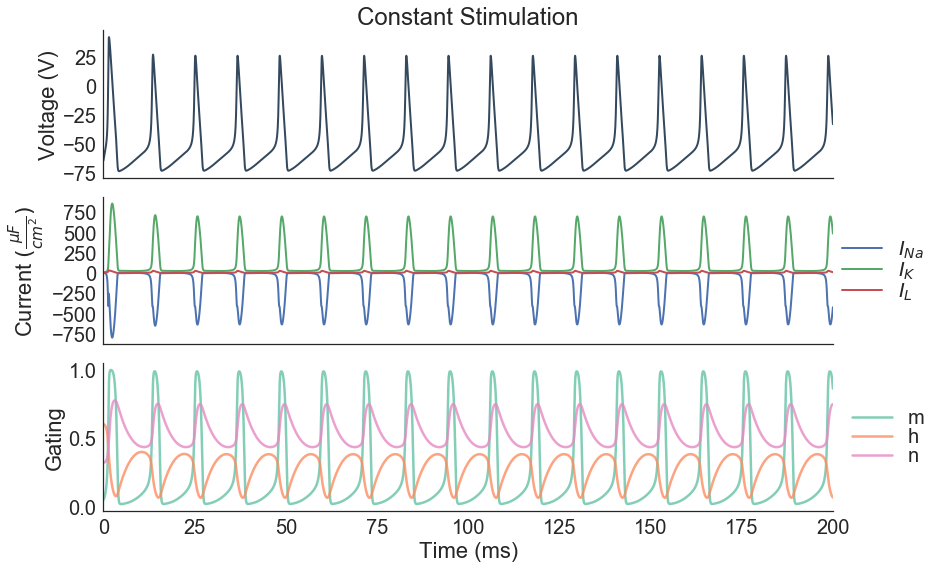

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters (ms).
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.ones_like(t) * 20

## Definite starting values.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

V, m, h, n = hodgkin_huxley(t, I, x0)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(3,1,figsize=(12,8),sharex=True)

## Plot voltage.
axes[0].plot(t, V, color='#34495e', linewidth=2)
axes[0].set(xlim=(t.min(), t.max()), yticks=np.arange(-75,50,25),ylabel='Voltage (V)',
            title='Constant Stimulation')

## Plot current.
axes[1].plot(t, I_Na(V, m, h), label=r'$I_{Na}$', linewidth=2)
axes[1].plot(t, I_K(V, n), label=r'$I_{K}$', linewidth=2)
axes[1].plot(t, I_L(V), label=r'$I_{L}$', linewidth=2)
axes[1].set(yticks=np.arange(-750,800,250), ylabel=r'Current $(\frac{\mu F}{cm^2})$')
axes[1].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

## Plot gating variables.
axes[2].plot(t, m, label='m', color='#66c2a5', alpha=0.8, linewidth=2.5)
axes[2].plot(t, h, label='h', color='#fc8d62', alpha=0.8, linewidth=2.5)
axes[2].plot(t, n, label='n', color='#e78ac3', alpha=0.8, linewidth=2.5)
axes[2].set(xlabel='Time (ms)', ylabel='Gating')
axes[2].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

sns.despine()
plt.tight_layout()

#### Variable Stimulation
If $t \in [50,150]$, then I = 10 $\frac{\mu A}{cm^2}$. Otherwise: I = 0 $\frac{\mu A}{cm^2}$


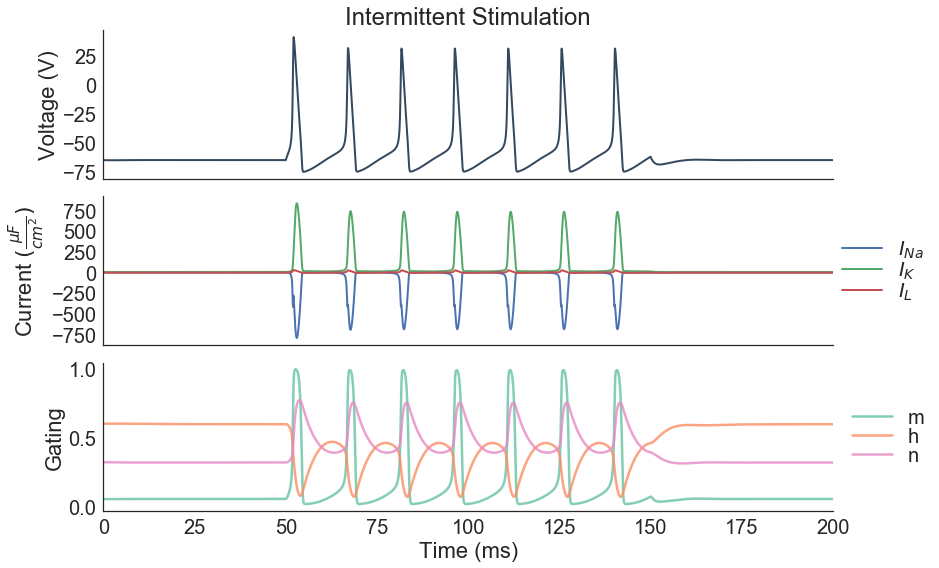

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters (ms).
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.zeros_like(t)
I[np.logical_and(t >= 50, t<=150)] = 10

## Definite starting values.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

V, m, h, n = hodgkin_huxley(t, I, x0)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(3,1,figsize=(12,8),sharex=True)

## Plot voltage.
axes[0].plot(t, V, color='#34495e', linewidth=2)
axes[0].set(xlim=(t.min(), t.max()), yticks=np.arange(-75,50,25),ylabel='Voltage (V)',
            title='Intermittent Stimulation')

## Plot current.
axes[1].plot(t, I_Na(V, m, h), label=r'$I_{Na}$', linewidth=2)
axes[1].plot(t, I_K(V, n), label=r'$I_{K}$', linewidth=2)
axes[1].plot(t, I_L(V), label=r'$I_{L}$', linewidth=2)
axes[1].set(yticks=np.arange(-750,800,250), ylabel=r'Current $(\frac{\mu F}{cm^2})$')
axes[1].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

## Plot gating variables.
axes[2].plot(t, m, label='m', color='#66c2a5', alpha=0.8, linewidth=2.5)
axes[2].plot(t, h, label='h', color='#fc8d62', alpha=0.8, linewidth=2.5)
axes[2].plot(t, n, label='n', color='#e78ac3', alpha=0.8, linewidth=2.5)
axes[2].set(xlabel='Time (ms)', ylabel='Gating')
axes[2].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

sns.despine()
plt.tight_layout()

### Problem 2b
Explore what happens to your solution as the time step size is increased. Does the solution remain bounded? For the condition I = 6.5 $\frac{\mu A}{cm^2}$ examine how the (absolute) time of the first action potential peak and the (absolute) time of, say, the tenth action potential peak are affected as you change the Euler time step from 0.01 to 0.06. Describe your findings with words and appropriate plots.

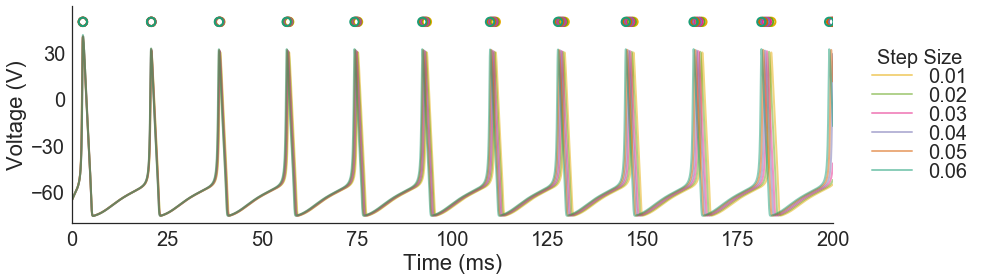

In [6]:
from mne.preprocessing.peak_finder import peak_finder

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters.
step_sizes = np.arange(0.01,0.07,0.01)

## Definite starting values.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
colors = sns.color_palette('Dark2', n_colors=6)[::-1]

# for ax, dt in zip(axes,step_sizes):
for dt, color in zip(step_sizes, colors):
   
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Run Simulation.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Define timing paramters (ms).
    t = np.arange(0,200+dt,dt)

    ## Define stimulation.
    I = np.ones_like(t) * 6.5
    
    ## Run simulation.
    V, m, h, n = hodgkin_huxley(t, I, x0)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Plot.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Plot voltage.
    ax.plot(t, V, linewidth=2, label=dt, color=color, alpha=0.5)
    
    ## Plot peaks.
    peak_loc, _ = peak_finder(V)
    ax.scatter(t[peak_loc], np.ones_like(peak_loc)*50, facecolor='none', edgecolor=color, marker='o', s=70, linewidth=2)
    
## Update plot.
ax.set(xlim=(t.min(), t.max()), xticks=np.arange(t.min(), t.max(), 25), xlabel='Time (ms)', 
       ylim=(-80,60), yticks=[-60,-30,0,30], ylabel='Voltage (V)')
ax.legend(loc=7, bbox_to_anchor=(1.2,0.5), labelspacing=0)
ax.legend_.set_title('Step Size', prop=dict(size=20))

sns.despine()
plt.tight_layout()

In the plot above, the action potentials generated for each step size is demarcated by color. The location of the spikes are indicated by the colored circles above each spike. As can be observed, a blurring of spikes and circles occurs as we move from the 1st spike to the $N$th spike. As it turns out, time difference sequential spikes diminishes as a function of increasing step size. This suggests that the solution is not bounded and is instead contingent on step size.

### Problem 2c
Neurons are often characterized by their $f-I$ curves in which firing rate of the neuron is plotted versus the amplitude of current injected through a microelectrode. Demonstrate this relationship for the Hodgkin-Huxley neuron. Check any thresholds that you find in both the increasing and decreasing $I$ directions. Can the injected current be tuned to produce an arbitrarily low firing rate? Print out appropriate plots.

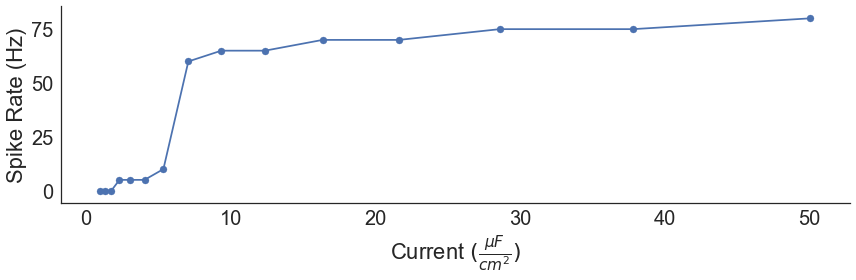

In [7]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define constants.
stimulation = np.logspace(0,np.log10(50),15)

## Define timing paramters.
dt = 0.01
t = np.arange(0,200+dt,dt)

## Definite starting values.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Preallocate space.
F = np.empty_like(stimulation)

for i in np.arange(stimulation.size):
    
    ## Define stimulation.
    I = np.ones_like(t) * i
    
    ## Run simulation.
    V, _, _, _ = hodgkin_huxley(t, I, x0)
    
    ## Find and count spikes.
    peak_loc, _ = peak_finder(V,75,verbose=False)
    F[i] = peak_loc.size / (t.max() * 1e-3 ) # Convert to Hz.
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot F/I curve.
ax.plot(stimulation,F)
ax.scatter(stimulation,F)
ax.set(xlabel=r'Current $(\frac{\mu F}{cm^2})$', ylabel='Spike Rate (Hz)')

sns.despine()
plt.tight_layout()

From the plot above, it is clear that injected current cannot be tuned to produce an arbitrarily low firing rate. Beneath some level of stimulation, the Hodgkin-Huxley neuron does not fire. 

(**Note:** In the plot above, the non-zero spike rates for low-level currents ($\leq$ 5 $\frac{\mu A}{cm^2}$) is driven by the interaction of the graded potential and peak-detection algorithm.)

## Problem 3: Robustness to biological changes in parameters. 
Quite separately from numerical integration methods, a critical issue for the biology itself is robustness: the sensitivity of the time evolution to parameter changes. Experimental evidence suggests that the characteristics of the action potential (shape/amplitude/threshold) and other dynamical features such as the tendency to fire a burst of spikes or to spontaneously oscillate are largely conserved across different classes of neurons in a given brain area. We will explore if this robustness found experimentally in biological neurons is consistent with that expected from Hodgkin/Huxley theory by examining how your action potential simulations change with changes in equation parameters.

### Problem 3a
We will consider the space clamped model and focus on the maximum sodium and potassium conductances, $g_{Na}$ and $g_{K}$. These conductances correspond to the density of voltage-dependent ion channel molecules in the cell membrane. The expected density in a cell will be dependent on synthesis and regulation. For example, there is genetic control of the synthesis of the protein and the biophysical process of inserting the protein into the appropriate location of the cell membrane can be regulated. In addition, post-translational modifications (such as phosphorylation) of the channel could regulate its activity (for example changing it from inactive, i.e. unable to pass ions, to active). Given that all of these factors contribute to the density of active channels and thus the membrane conductances, it is important to ask how robust is action potential generation in the Hodkin-Huxley model with changes in $g_{Na}$ and $g_{K}$. Perform numerical simulations under different sets of values for these two parameters, with I = 6.5 $\frac{\mu A}{cm^2}$. Describe your findings with words and appropriate plots. How accurately do the sodium and potassium conductances need to be controlled to produce an action potential?

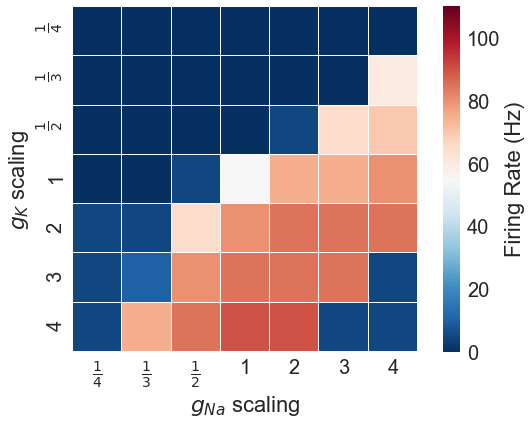

In [8]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters.
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.ones_like(t) * 6.5

## Definite starting values.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

## Define scale functions.
scales = np.array([1/4, 1/3, 1/2, 1, 2, 3, 4])
n_scales = scales.size
scales = np.array(np.meshgrid(scales, scales)).reshape(2,n_scales**2).T

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Preallocate space.
F = np.empty(scales.shape[0])

for i in np.arange(F.size):
    
    ## Define conductance constants.
    g_Na, g_K = scales[i] * np.array([120, 36])
    
    ## Simulate HH neuron.
    V, _, _, _ = hodgkin_huxley(t, I, x0, g_Na=g_Na, g_K=g_K)
    
    ## Find and count spikes.
    peak_loc, _ = peak_finder(V,75,verbose=False)
    F[i] = peak_loc.size / (t.max() * 1e-3 ) # Convert to Hz.
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,6))

## Plot firing rates.
F = F.reshape(n_scales, n_scales)
ax = sns.heatmap(F, center=F[3,3], vmin=0, vmax=F[3,3]*2, square=True, linewidths=0.01, 
                 cbar_kws=dict(label='Firing Rate (Hz)'), ax=ax)
ax.invert_yaxis()
ax.set(xticklabels=[r'$\frac{1}{4}$', r'$\frac{1}{3}$', r'$\frac{1}{2}$', 1, 2, 3, 4],
       yticklabels=[r'$\frac{1}{4}$', r'$\frac{1}{3}$', r'$\frac{1}{2}$', 1, 2, 3, 4],
       xlabel=r'$g_{Na}$ scaling', ylabel=r'$g_{K}$ scaling')

plt.tight_layout()

The above plot shows the firing rate of the Hodgkin-Huxley neuron with various combinations of scaling factors applied to default conductance values, $g_{Na}$ = 120 and $g_{K}$ = 36. The diagonal pattern observed indicates that insofar $\frac{g_{Na}}{g_{K}} \geq 4$ (approximately), the Hodgkin-Huxley neuron will fire at stimulation I = 6.5 $\frac{\mu A}{cm^2}$. (Note that this, however, does not seem to hold true for extremely high values of $\frac{g_{Na}}{g_{K}}$.) This observation can be confirmed by plotting the data above another way:

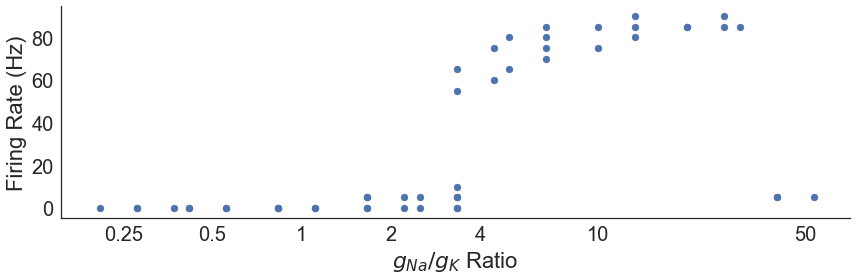

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(scales[:,0] / scales[:,1] * 120/36, F.flatten())
ax.set(xscale='log')
ax.set(xticks=[1/4, 1/2, 1, 2, 4, 10, 50], xticklabels=[0.25, 0.5, 1, 2, 4, 10, 50],
       xlabel=r'$g_{Na}/g_{K}$ Ratio', ylabel='Firing Rate (Hz)')

sns.despine()
plt.tight_layout()

### Problem 3b
How can a biological neuron deal with this situation? One very general engineering strategy is to use feedback signals that change with the dynamics to tune important parameters until the desired behavior is produced. The cell biological processes described above for regulating channel density may themselves be regulated by intracellular ”second messenger” signaling molecules. An intriguing second messenger molecule for the problem of tuning the electrophysiological properties of a neuron is the calcium ion which is present in very low intracellular concentration (100 nM), with extracellular concentration in the mM range. It has been widely observed that calcium ion levels in neurons change during trains of action potentials because of calcium influx through voltage-dependent ion channels that are activated during depolarization of the membrane. Furthermore many intracellular biochemical reaction pathways are regulated by calcium. Assuming the existence of these processes, provide a very general description of a mechanism in neurons that could explain the experimental observation that action potential generation is robust.